<h1><strong>Iris Dataset</strong></h1>

In this project, I will use Iris dataset, which is quite popular in the data science world. This dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length. I'm going to analyse, visualize and then, build a classification model. 

In [3]:
#First things first. I'm importing all the dependencies.

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

In [18]:
#Importing my dataset here.

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
#Looking at my first 5 rows

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
#Getting information about datatypes and the count of non-nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [21]:
#Looking at the descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [23]:
#I'm grouping the species of irises and looking at their descriptive statistics

df.groupby("species").agg(["min", "max", "std", "mean"])

sepal length (cm)                 ... petal width (cm)                 
                         min  max       std  ...              max       std   mean
species                                      ...                                  
setosa                   4.3  5.8  0.352490  ...              0.6  0.105386  0.246
versicolor               4.9  7.0  0.516171  ...              1.8  0.197753  1.326
virginica                4.9  7.9  0.635880  ...              2.5  0.274650  2.026

[3 rows x 16 columns]

**Data Visualization**

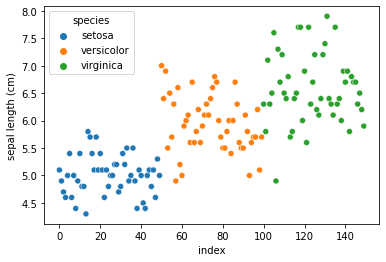

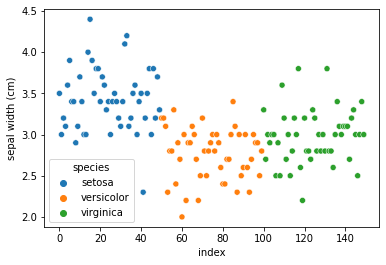

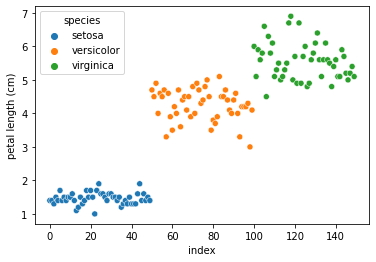

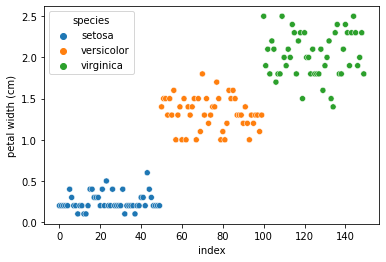

In [29]:
#Visualizing the data as scatter plots according to the species and sepal and petal sizes

df.reset_index(inplace=True)

for column in df.columns[1:-1]:
    sns.scatterplot(data=df, x="index", y=column, hue="species")
    plt.show()

**Label Encoding**

In [33]:
#Here, we have to convert the non-numeric species variables to numeric variables. We are going to use label encoding method


le = LabelEncoder()
target = le.fit_transform(df["species"])
df["species"] = target
df.head()

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


**Test-Train Split**

In [34]:
#Splitting my data as train and test models
#X indicates independent variable(s), y indicates dependent variable

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1], test_size=0.2)

**Machine Learning Model**

In [38]:
xgb_clas = xgb.XGBClassifier(objective="multi:softmax", num_class=3)

In [39]:
xgb_clas.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [40]:
pred = xgb_clas.predict(X_test)

In [42]:
accuracy_score(y_test, pred)

0.9333333333333333

In [44]:
confusion_matrix(y_test, pred)

array([[13,  0,  0],
       [ 0,  6,  2],
       [ 0,  0,  9]])

**Conclusion** 

---

When we look at the accuracy score, also the confusion matrix, the model classified the species very well according to their sepal and petal sizes. There is no further need to fine-tune the model.